<a href="https://colab.research.google.com/github/tacklesta/Covid--19-Analysis/blob/main/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plotly
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv("covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df.shape

(38889, 10)

In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,38889.000000,38889.000000,3.888900e+04,38889.000000,38889.000000,3.888900e+04
mean,21.362269,23.701848,9.020540e+03,560.147754,3402.299082,5.058093e+03
std,24.969887,70.158193,7.100308e+04,4543.654747,22340.891460,4.862819e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-1.400000e+01
25%,7.540000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.685000,21.758700,7.700000e+01,1.000000,9.000000,1.200000e+01
75%,41.204400,81.000000,8.840000e+02,12.000000,294.000000,3.170000e+02
max,71.706900,178.065000,2.191052e+06,118434.000000,599115.000000,1.473503e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB


In [ ]:
df = pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  11622 non-null  object        
 1   Country/Region  38889 non-null  object        
 2   Lat             38889 non-null  float64       
 3   Long            38889 non-null  float64       
 4   Date            38889 non-null  datetime64[ns]
 5   Confirmed       38889 non-null  int64         
 6   Deaths          38889 non-null  int64         
 7   Recovered       38889 non-null  int64         
 8   Active          38889 non-null  int64         
 9   WHO Region      38889 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.0+ MB


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df.drop(["Province/State"],axis = 1,inplace = True)
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df.rename(columns = {"Country/Region":"Country"},inplace = True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
df["Active"] = df['Confirmed']-df['Recovered']-df['Deaths']

df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.1533,20.1683,2020-01-22,0,0,0,0,Europe
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0,Europe
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa


In [ ]:
top = df[df["Date"]=='2020-06-01']
len(top)

261

In [ ]:
world = top.groupby('Country')["Recovered",'Deaths','Active','Confirmed'].sum()

In [ ]:
world.tail(10)

,Recovered,Deaths,Active,Confirmed
Country,,,,
United Kingdom,1221,39127,237388,277736
Uruguay,689,23,113,825
Uzbekistan,2859,15,828,3702
Venezuela,302,17,1343,1662
Vietnam,293,0,35,328
West Bank and Gaza,372,3,74,449
Western Sahara,6,1,2,9
Yemen,14,84,256,354
Zambia,912,7,170,1089


In [ ]:
world.reset_index(inplace = True)

In [ ]:
world.head()



,Country,Recovered,Deaths,Active,Confirmed
0,Afghanistan,1428,265,14057,15750
1,Albania,877,33,233,1143
2,Algeria,5894,661,2958,9513
3,Andorra,698,51,16,765
4,Angola,18,4,64,86


In [ ]:
figure = plotly.choropleth(world,locations = 'Country',locationmode ='country names',color = 'Active',range_color =[1,10000],color_continuous_scale="Bluered",title = 'Countries With Active Cases')

figure.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
total_confirmed = df.groupby(['Date'])['Confirmed','Deaths','Active','Recovered'].sum()
total_confirmed = total_confirmed.reset_index()
total_confirmed.head()

,Date,Confirmed,Deaths,Active,Recovered
0,2020-01-22,555,17,510,28
1,2020-01-23,654,18,606,30
2,2020-01-24,941,26,879,36
3,2020-01-25,1434,42,1353,39
4,2020-01-26,2118,56,2010,52


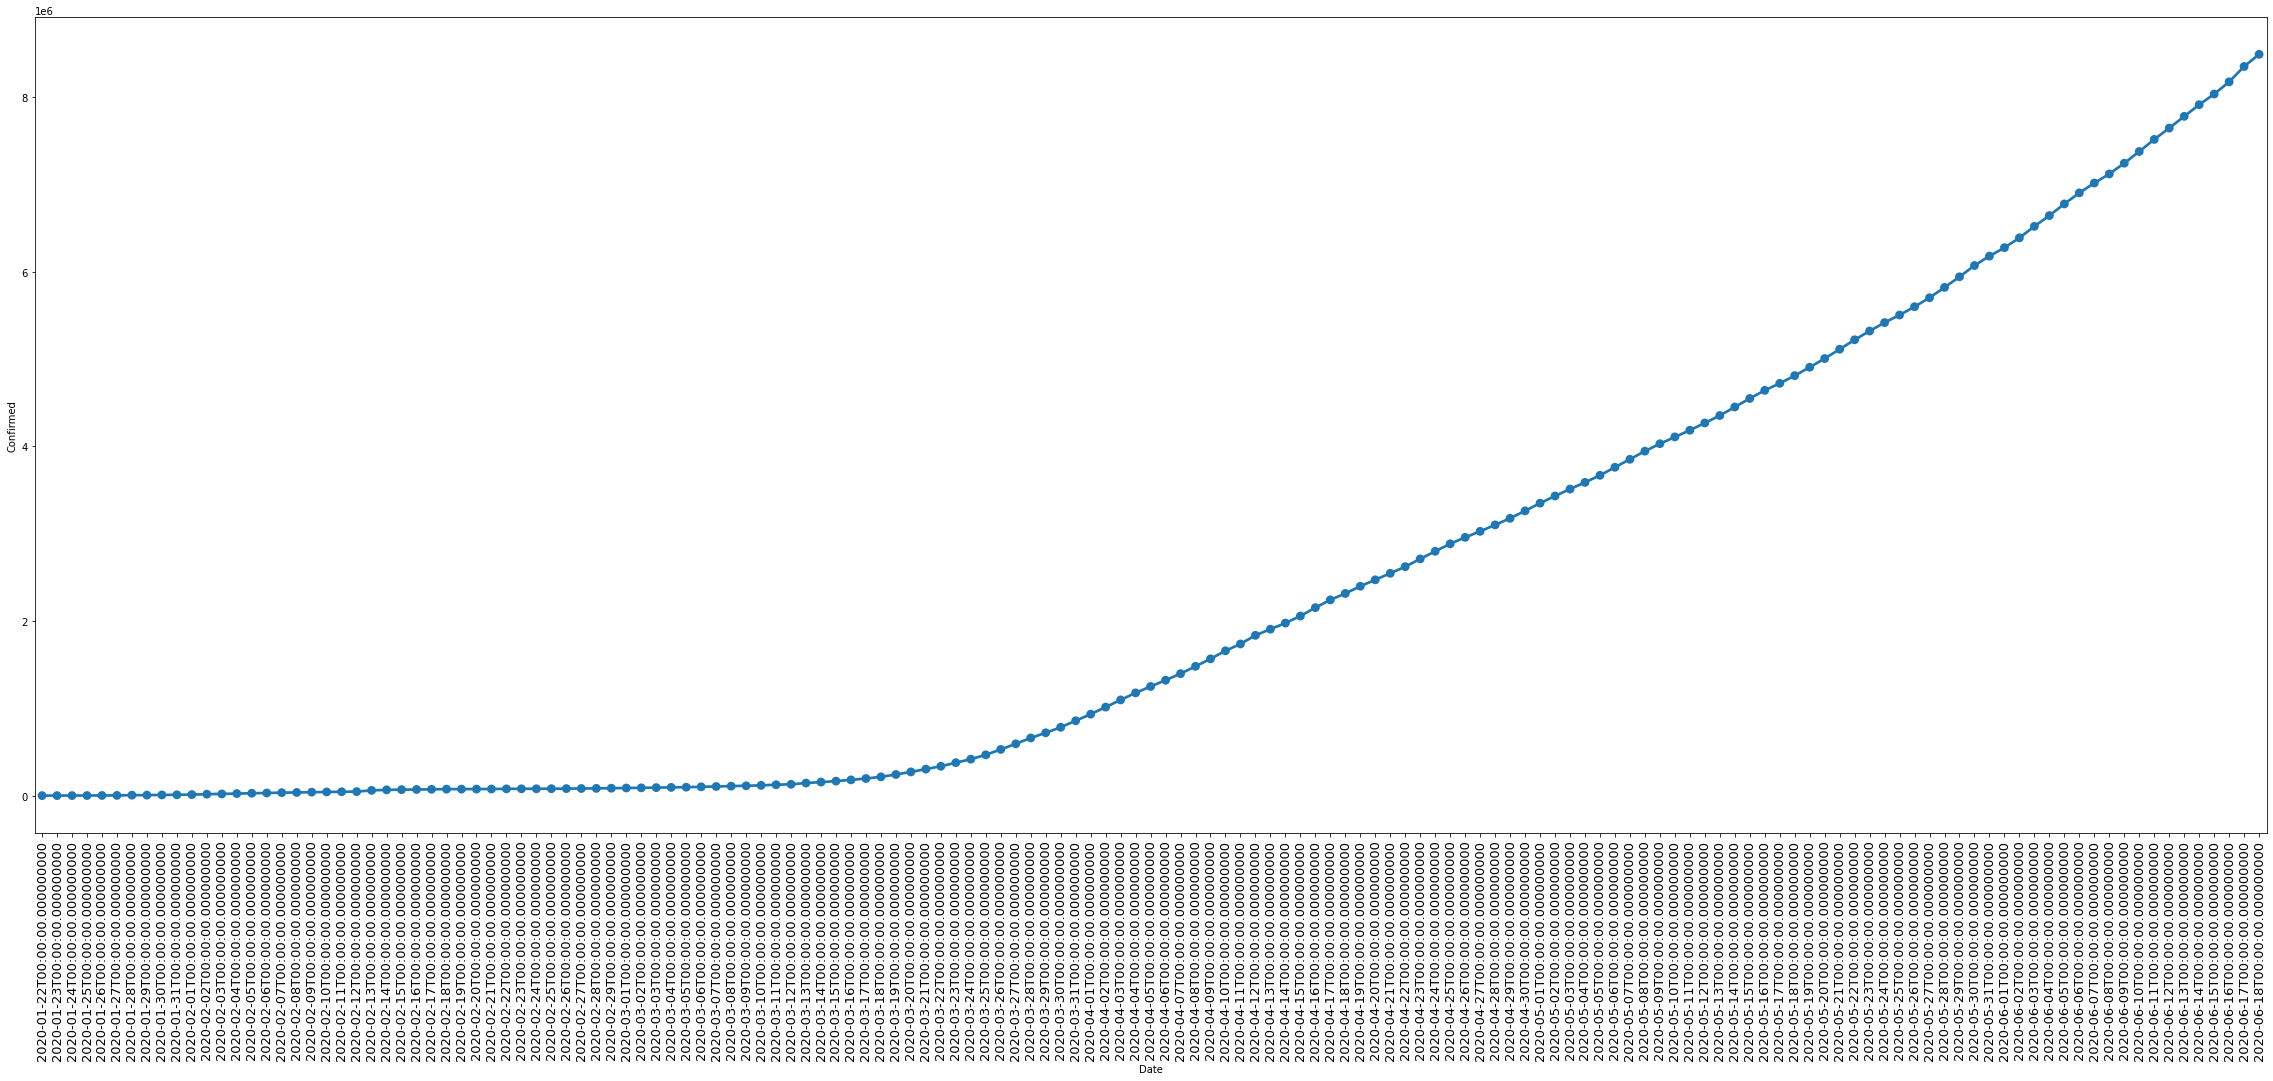

In [ ]:
plt.figure(figsize = (40,15))
x = total_confirmed["Date"]
y = total_confirmed["Confirmed"]
plt.xticks(rotation = 90,fontsize = 13)
sns.pointplot(x,y)

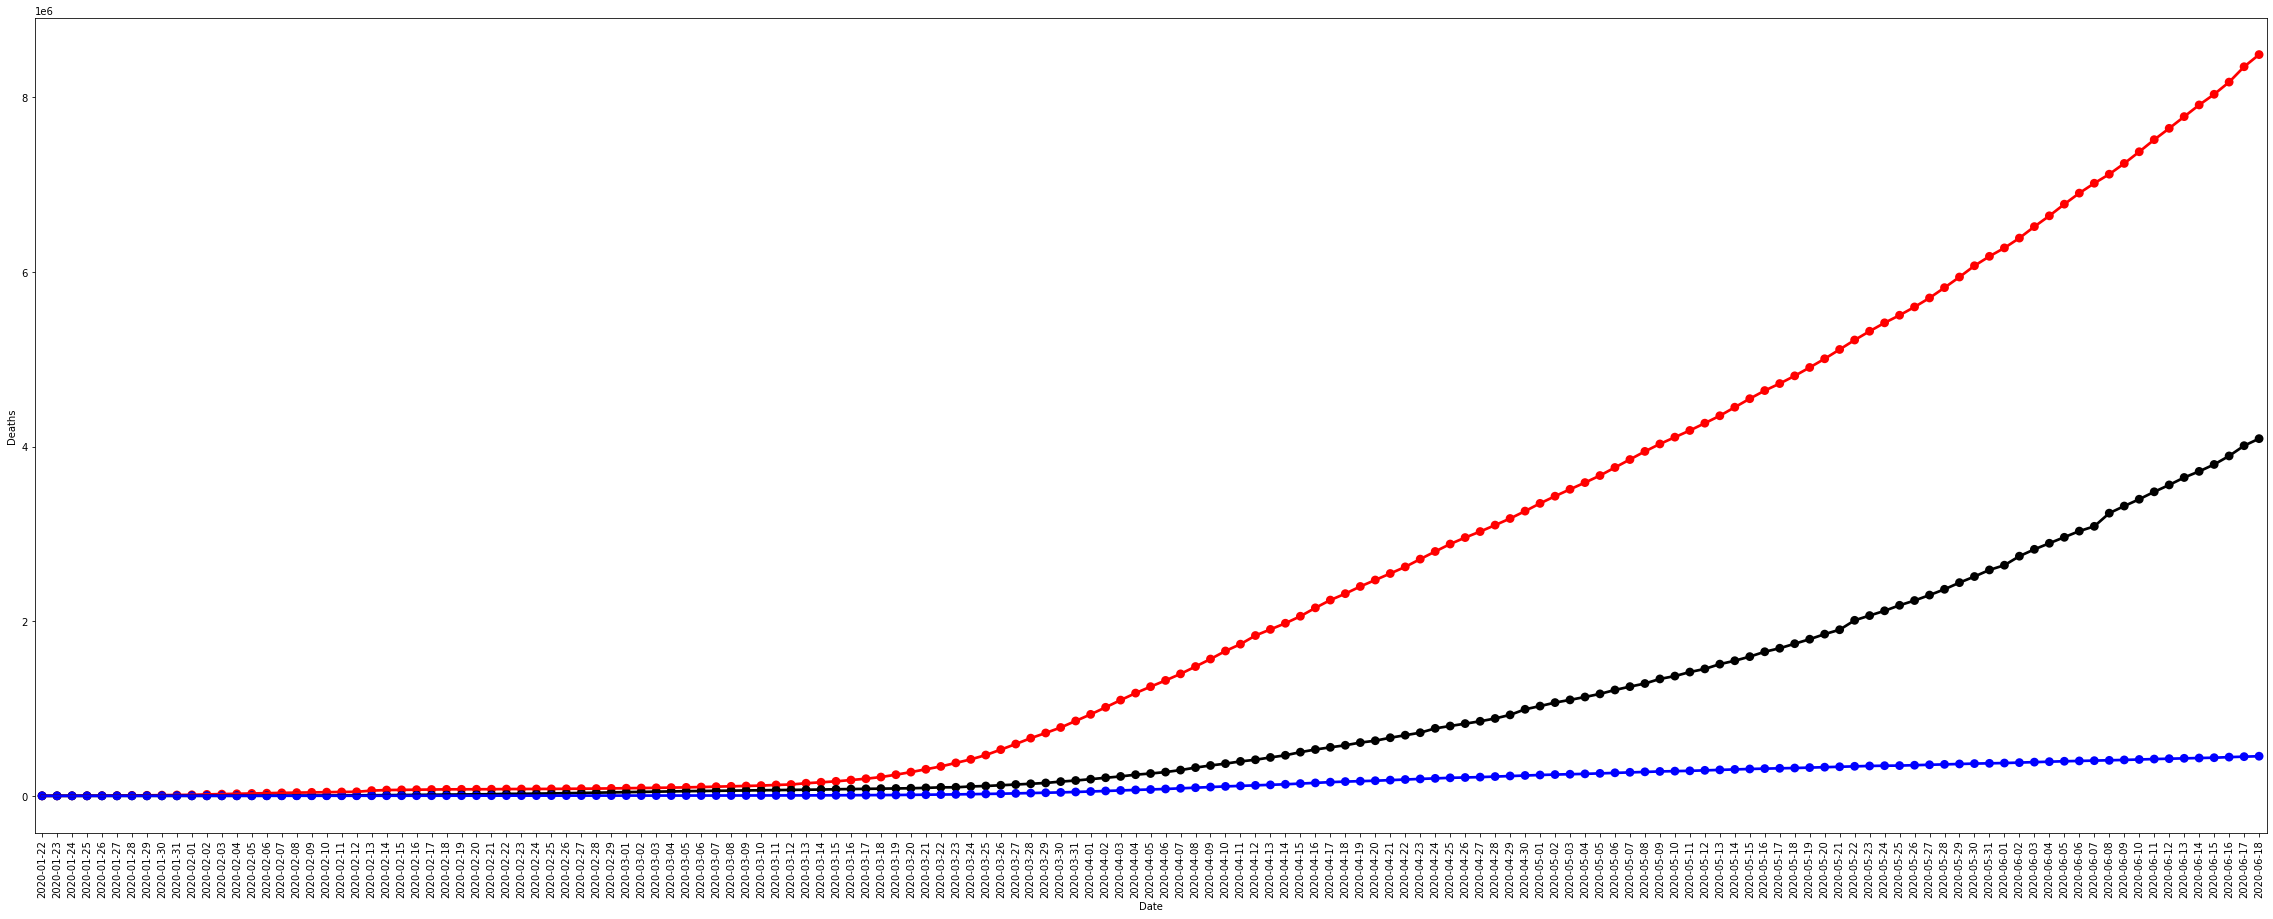

In [ ]:
plt.figure(figsize = (40,15))
plt.xticks(rotation=90,fontsize=10)
x=total_confirmed["Date"].dt.date
y=total_confirmed["Confirmed"]
x1=total_confirmed["Date"].dt.date
y1=total_confirmed["Recovered"]
x2=total_confirmed["Date"].dt.date
y2=total_confirmed["Deaths"]
sns.pointplot(x,y,color = 'red')
sns.pointplot(x1,y1,color = 'black')
sns.pointplot(x2,y2,color = 'blue')
plt.show()

In [ ]:
top_active = top.groupby('Country')['Confirmed','Recovered','Deaths'].sum()

In [ ]:
top_active.sort_values('Confirmed',ascending = False,inplace = True)

In [ ]:
top_active.reset_index(inplace = True)

In [ ]:
top_active.head()

,Country,Confirmed,Recovered,Deaths
0,US,1816476,458231,105430
1,Brazil,526447,211080,29937
2,Russia,414328,175514,4849
3,United Kingdom,277736,1221,39127
4,Spain,239638,150376,27127


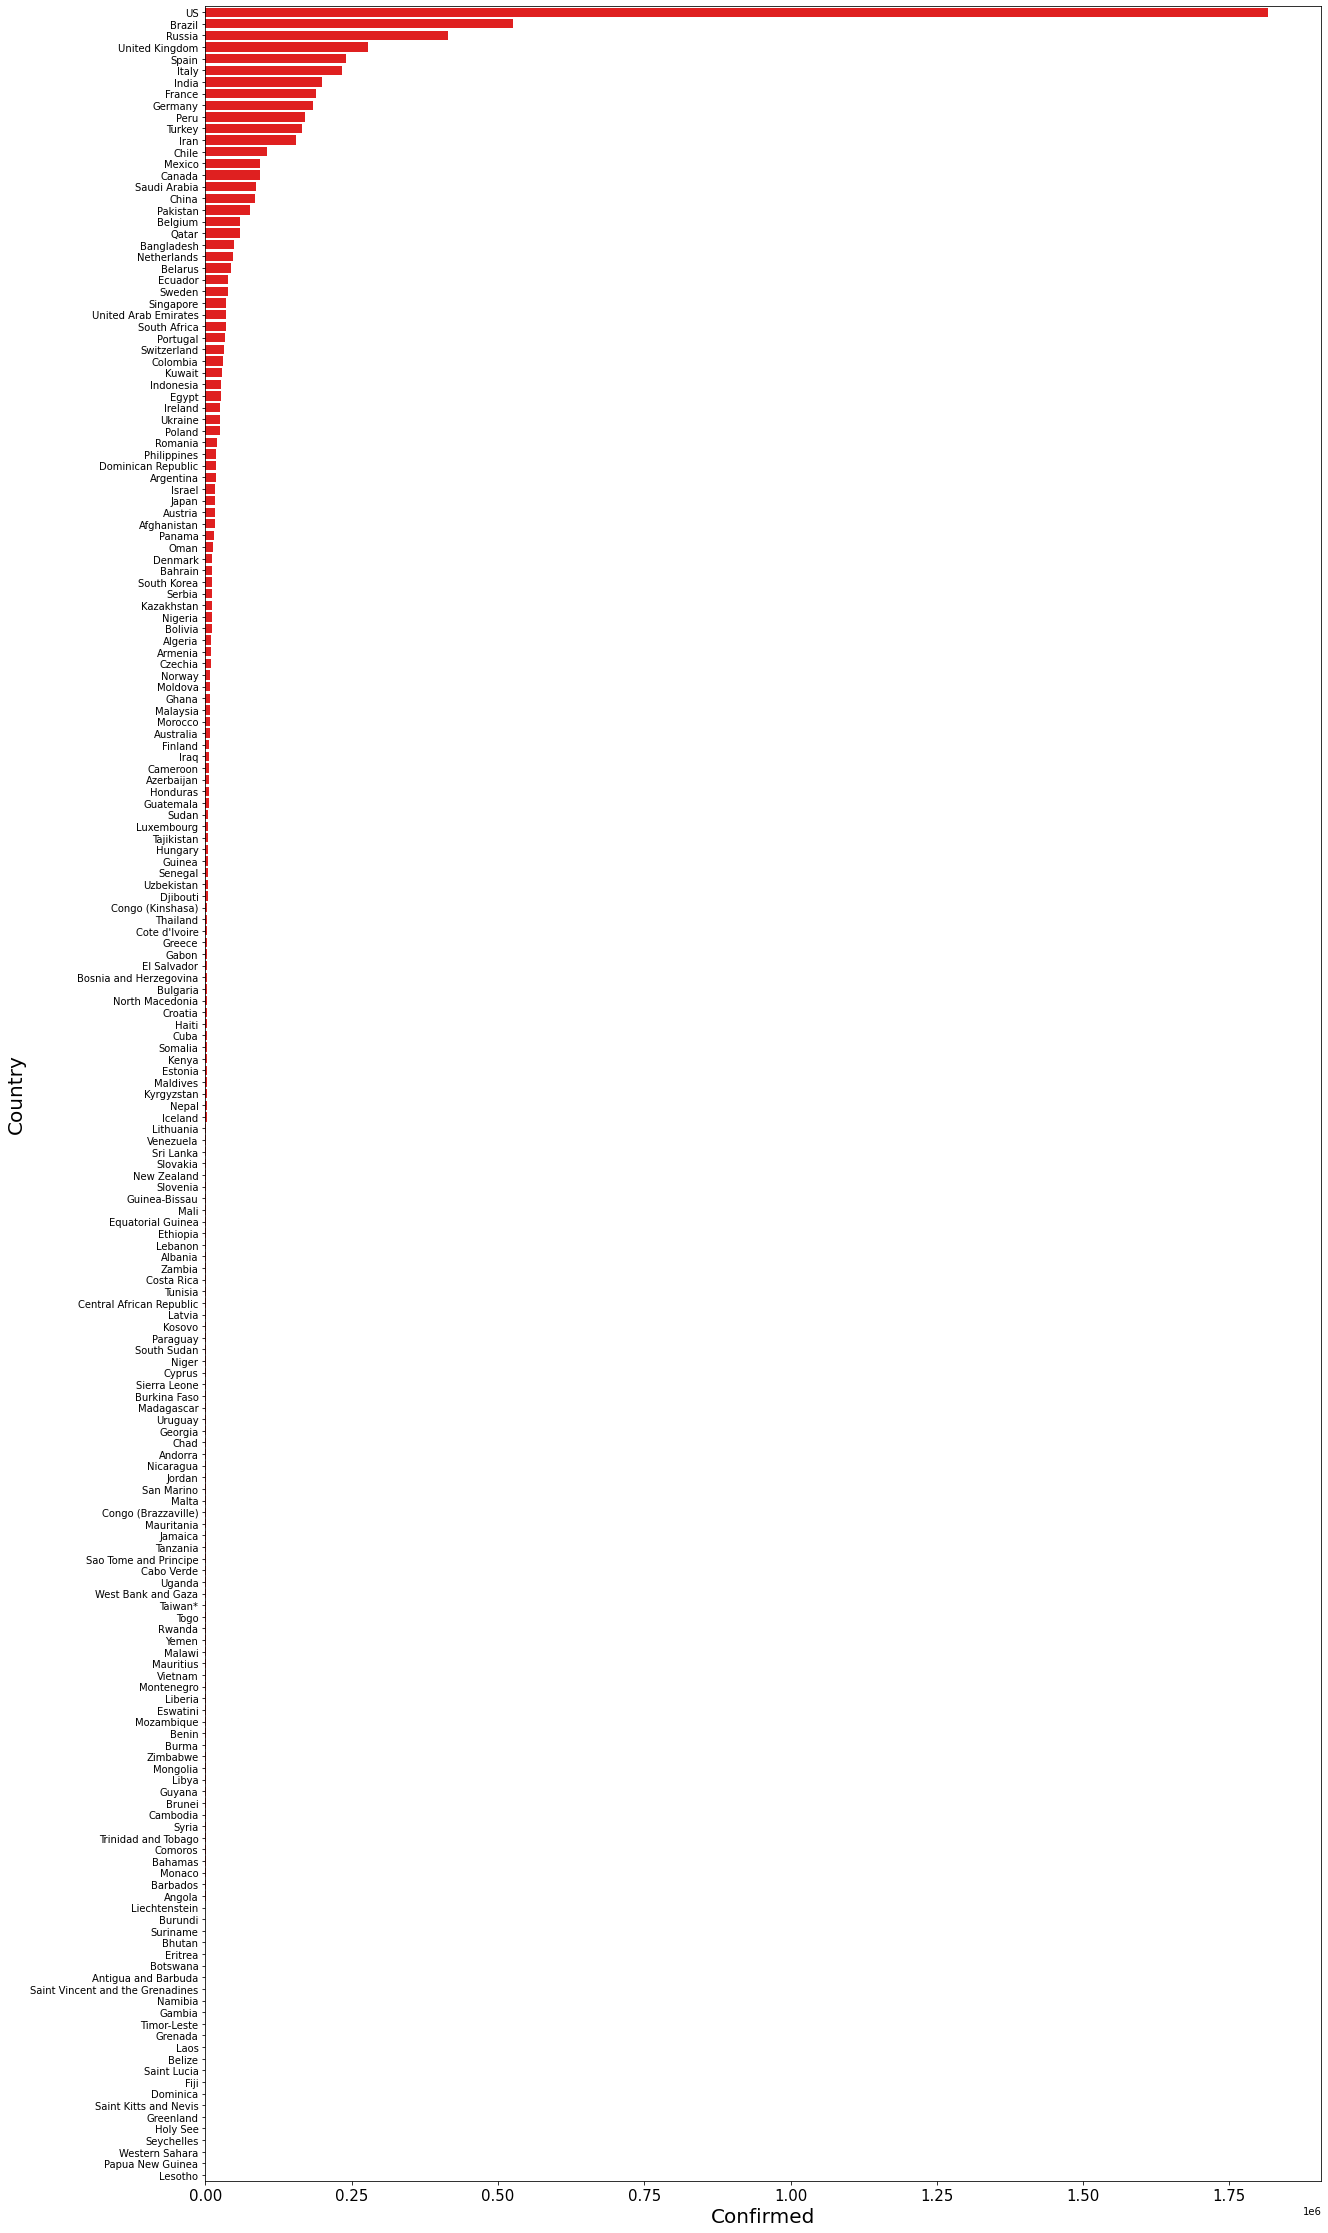

In [ ]:
plt.figure(figsize=(20,40))
x=top_active['Confirmed']
y=top_active['Country']
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
plt.xlabel('Confirmed',fontsize = 20)
plt.ylabel('Country',fontsize = 20)
sns.barplot(x,y,color='red',label='Confirmed')
plt.show()

In [ ]:
top_10 = top_active.head(10)

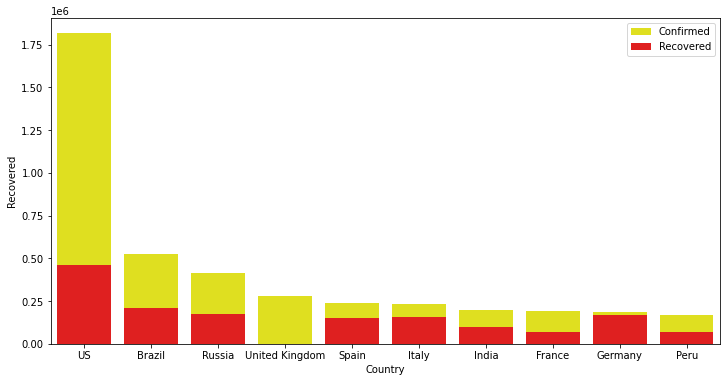

In [ ]:
plt.figure(figsize = (12,6))
y=top_10["Confirmed"]
x=top_10["Country"]
y1 = top_10['Recovered']
sns.barplot(x,y,color = 'yellow',label = 'Confirmed')
sns.barplot(x,y1,color = 'red',label = 'Recovered')
plt.legend()
plt.show()

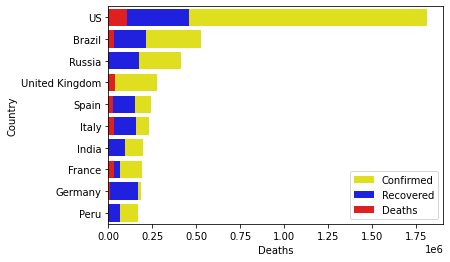

In [ ]:
x=top_10["Confirmed"]
y=top_10["Country"]
x1 = top_10['Deaths']
x2 = top_10["Recovered"]
sns.barplot(x,y,color = 'yellow',label = 'Confirmed')
sns.barplot(x2,y,color = 'blue',label = 'Recovered')
sns.barplot(x1,y,color = 'red',label = 'Deaths')
plt.legend()
plt.show()

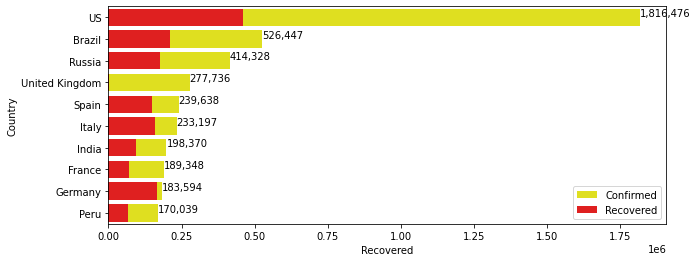

In [ ]:
plt.figure(figsize = (10,4))
x=top_10["Confirmed"]
y=top_10["Country"]
x1 = top_10['Recovered']
ax = sns.barplot(x,y,color = 'yellow',label = 'Confirmed')
ax1 = sns.barplot(x1,y,color = 'red',label = 'Recovered')
for i,(value,name) in enumerate(zip(top_10["Confirmed"],top_10['Country'])):
    ax.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.legend(loc=4)
plt.show()

In [ ]:
top_10.to_csv('top_10_covid.csv')

In [ ]:
India = df[df["Country"]=='India']
India.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,India,21.0,78.0,2020-01-22,0,0,0,0,South-East Asia
390,India,21.0,78.0,2020-01-23,0,0,0,0,South-East Asia
651,India,21.0,78.0,2020-01-24,0,0,0,0,South-East Asia
912,India,21.0,78.0,2020-01-25,0,0,0,0,South-East Asia
1173,India,21.0,78.0,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
India=India.groupby('Date')["Confirmed",'Active','Recovered','Deaths'].sum().reset_index()

In [ ]:
India.head()

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


In [ ]:
Italy = df[df["Country"]=='Italy']
Italy=Italy.groupby('Date')["Confirmed",'Active','Recovered','Deaths'].sum().reset_index()
Italy.head()

,Date,Confirmed,Active,Recovered,Deaths
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0


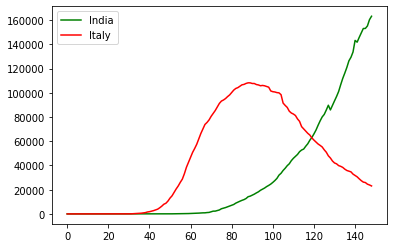

In [ ]:
plt.plot(India.index,India['Active'],color="Green",label="India")
plt.plot(Italy.index,Italy['Active'],color="Red",label="Italy")
plt.legend(loc=2)
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head(10)

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [ ]:
model=Prophet(interval_width=0.95)
confirmed.rename(columns = {'Date':'ds','Confirmed':'y'},inplace = True)

In [ ]:
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = model.make_future_dataframe(periods=14)
future_dates.head(14)

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
5,2020-01-27
6,2020-01-28
7,2020-01-29
8,2020-01-30
9,2020-01-31


In [ ]:
forecast = model.predict(future_dates)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-8.025916e+03,-6.550235e+04,4.094500e+04,-8.025916e+03,-8.025916e+03,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,0.0,0.0,0.0,-9.960675e+03
1,2020-01-23,-5.317099e+03,-5.964832e+04,5.432731e+04,-5.317099e+03,-5.317099e+03,3756.729985,3756.729985,3756.729985,3756.729985,3756.729985,3756.729985,0.0,0.0,0.0,-1.560369e+03
2,2020-01-24,-2.608283e+03,-6.100685e+04,5.892812e+04,-2.608283e+03,-2.608283e+03,1663.717096,1663.717096,1663.717096,1663.717096,1663.717096,1663.717096,0.0,0.0,0.0,-9.445660e+02
3,2020-01-25,1.005332e+02,-4.999846e+04,6.032490e+04,1.005332e+02,1.005332e+02,3710.564360,3710.564360,3710.564360,3710.564360,3710.564360,3710.564360,0.0,0.0,0.0,3.811098e+03
4,2020-01-26,2.809349e+03,-5.021788e+04,6.348596e+04,2.809349e+03,2.809349e+03,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,0.0,0.0,0.0,4.465871e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2020-06-28,9.514114e+06,9.404162e+06,9.629979e+06,9.409714e+06,9.612419e+06,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,1656.522054,0.0,0.0,0.0,9.515771e+06
159,2020-06-29,9.631235e+06,9.503072e+06,9.754032e+06,9.512559e+06,9.747458e+06,-3687.662154,-3687.662154,-3687.662154,-3687.662154,-3687.662154,-3687.662154,0.0,0.0,0.0,9.627548e+06
160,2020-06-30,9.748357e+06,9.607143e+06,9.890499e+06,9.616049e+06,9.881757e+06,-5165.112134,-5165.112134,-5165.112134,-5165.112134,-5165.112134,-5165.112134,0.0,0.0,0.0,9.743192e+06
161,2020-07-01,9.865478e+06,9.715499e+06,1.002485e+07,9.717946e+06,1.001287e+07,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,-1934.759207,0.0,0.0,0.0,9.863543e+06


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
158,2020-06-28,9.515771e+06,9.404162e+06,9.629979e+06
159,2020-06-29,9.627548e+06,9.503072e+06,9.754032e+06
160,2020-06-30,9.743192e+06,9.607143e+06,9.890499e+06
161,2020-07-01,9.863543e+06,9.715499e+06,1.002485e+07
162,2020-07-02,9.986356e+06,9.822267e+06,1.015635e+07


In [ ]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


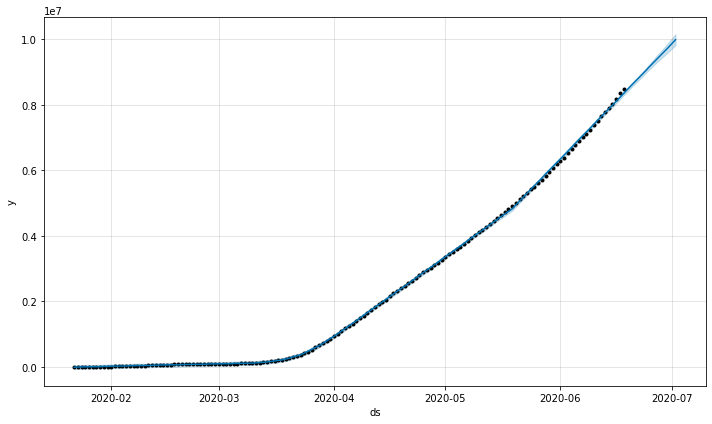

In [ ]:
confirmed_plot=model.plot(forecast)

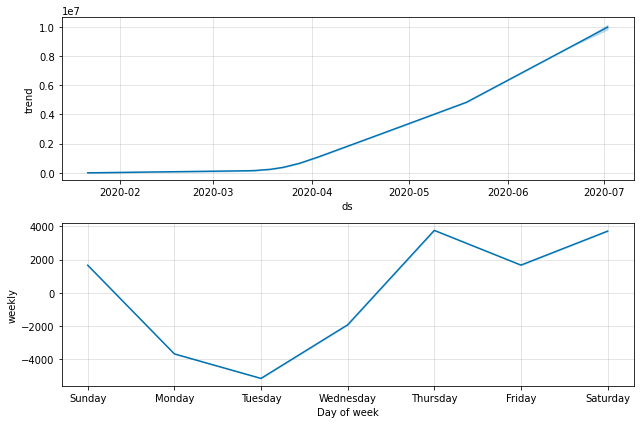

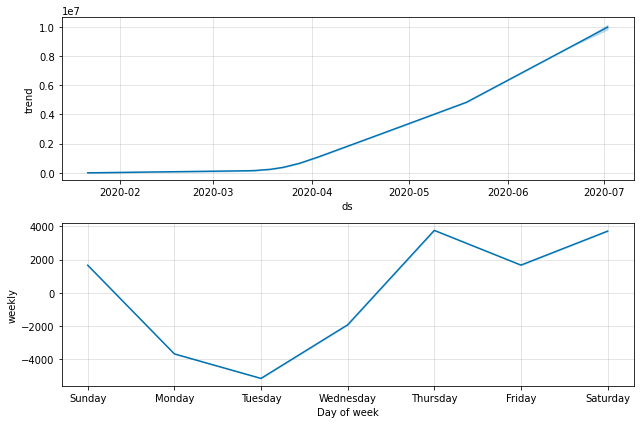

In [ ]:
model.plot_components(forecast)

In [ ]:
India = df[df['Country']=='India']
India.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,India,21.0,78.0,2020-01-22,0,0,0,0,South-East Asia
390,India,21.0,78.0,2020-01-23,0,0,0,0,South-East Asia
651,India,21.0,78.0,2020-01-24,0,0,0,0,South-East Asia
912,India,21.0,78.0,2020-01-25,0,0,0,0,South-East Asia
1173,India,21.0,78.0,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
confirmed = India.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.head()

,Date,Confirmed
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
model = Prophet(interval_width=0.95)
confirmed.rename(columns={'Date':'ds','Confirmed':'y'},inplace = True)
confirmed.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [ ]:
model.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods =30)
forecast = model.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)


,ds,yhat,yhat_lower,yhat_upper
164,2020-07-04,503090.127237,485099.863818,520395.835998
165,2020-07-05,512250.855517,492200.720959,531085.391598
166,2020-07-06,521190.812674,499373.057178,541970.128258
167,2020-07-07,530271.659972,507411.869729,552485.692318
168,2020-07-08,539261.184838,516127.873803,562332.219337
169,2020-07-09,548379.714361,523578.954049,574223.084411
170,2020-07-10,556356.510640,527107.270650,584950.446465
171,2020-07-11,565428.241188,537366.128589,593104.573305
172,2020-07-12,574588.969468,543453.838766,603189.190872
173,2020-07-13,583528.926625,551647.659917,614365.039830


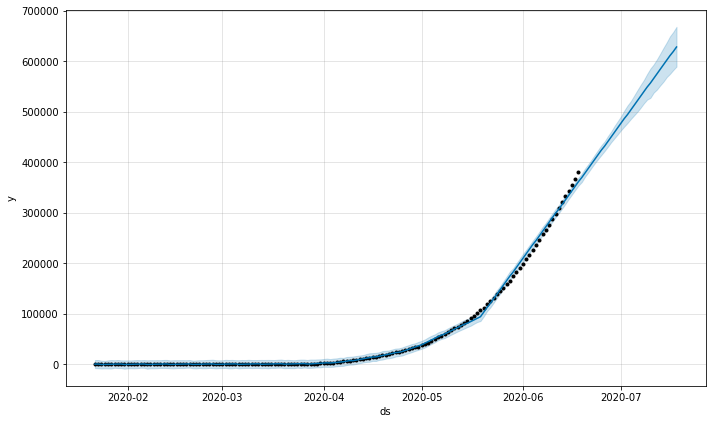

In [ ]:
plot = model.plot(forecast)


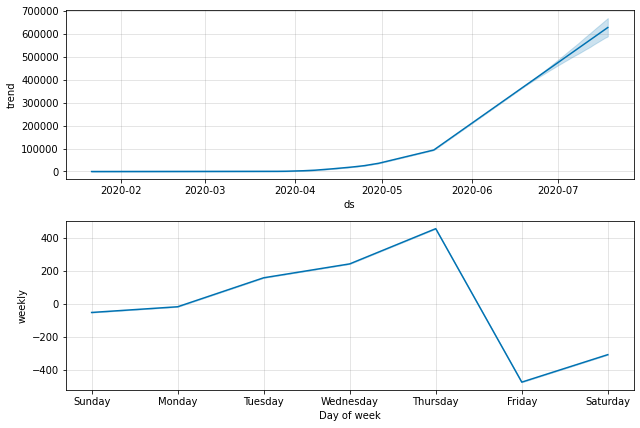

In [ ]:
week = model.plot_components(forecast)


In [ ]:
forecast.to_csv("forecast.csv")